In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
forestfires = pd.read_csv('forestfires.csv')

In [3]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
x = forestfires.iloc[:,2:30]
y = forestfires.iloc[:,30]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FFMC      517 non-null    float64
 1   DMC       517 non-null    float64
 2   DC        517 non-null    float64
 3   ISI       517 non-null    float64
 4   temp      517 non-null    float64
 5   RH        517 non-null    int64  
 6   wind      517 non-null    float64
 7   rain      517 non-null    float64
 8   area      517 non-null    float64
 9   dayfri    517 non-null    int64  
 10  daymon    517 non-null    int64  
 11  daysat    517 non-null    int64  
 12  daysun    517 non-null    int64  
 13  daythu    517 non-null    int64  
 14  daytue    517 non-null    int64  
 15  daywed    517 non-null    int64  
 16  monthapr  517 non-null    int64  
 17  monthaug  517 non-null    int64  
 18  monthdec  517 non-null    int64  
 19  monthfeb  517 non-null    int64  
 20  monthjan  517 non-null    int64 

In [9]:
le = LabelEncoder()
#forestfires["size_category"] = le.fit_transform(forestfires["size_category"])
y = le.fit_transform(y)


In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [40]:
#create Model
model = Sequential()
model.add(Dense(28, activation= 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [49]:
# Fit the model
history = model.fit(x, y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1050 - accuracy: 0.9769 - val_loss: 0.3276 - val_accuracy: 0.9064
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.9682 - val_loss: 0.1319 - val_accuracy: 0.9532
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9855 - val_loss: 0.2327 - val_accuracy: 0.9357
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9913 - val_loss: 0.1842 - val_accuracy: 0.9474
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.3586 - val_accuracy: 0.9240
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9884 - val_loss: 0.2299 - val_accuracy: 0.9415
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.1630 - val_accuracy: 0.9474
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9942 - val_loss: 0.1917 - val_accuracy: 0.9591
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9913 - val_loss: 0.4450 - val_accuracy: 0.9298
Epoch 61/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.1748 - val_accuracy: 0.9415
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9769 - val_loss: 0.2137 - val_accuracy: 0.9532
Epoch 63/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9942 - val_loss: 0.2340 - val_accuracy: 0.9532
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.1219 - val_accuracy: 0.9532
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9913 - val_loss: 0.1308 - val_accuracy: 0.9532
Epoch 

In [50]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.9749
accuracy: 97.49%


In [51]:
# Visualize training history

# list all data in history
model.history.history.keys()


dict_keys([])

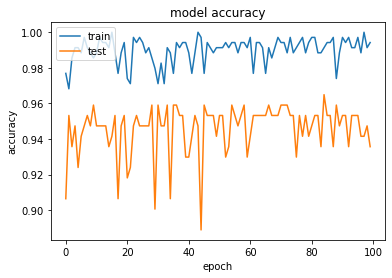

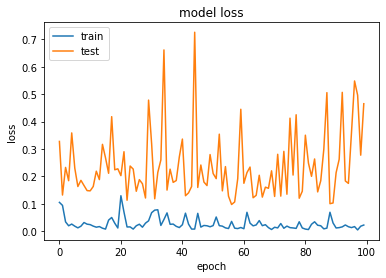

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
